# Project 9 Lucas Zheng 
I am going to analyze Tesla stock data with TSLA.cvs file download from yahoo

Souce: Yahoo finance, Python library, Pandas library,Matplot library,chatgpt

https://finance.yahoo.com/quote/TSLA/history?period1=1277769600&period2=1701216000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true


In [1]:
#import all the mods that I might use

from datetime import datetime

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read tesla file, from IPO to 2023-11/28
df_tesla = pd.read_csv("TSLA.csv")
df_tesla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3373,2023-11-21,235.039993,243.619995,233.339996,241.199997,241.199997,122288000
3374,2023-11-22,242.039993,244.009995,231.399994,234.210007,234.210007,117950600
3375,2023-11-24,233.750000,238.750000,232.330002,235.449997,235.449997,65125200
3376,2023-11-27,236.889999,238.330002,232.100006,236.080002,236.080002,112031800


# Data wrangling

In [3]:
# Add a daily percentage change for futher analysis  by percent change function 
df_tesla['Daily_Change'] = df_tesla['Close'].pct_change() * 100

# Convert the 'Date' column to datetime format 
df_tesla['Date'] = pd.to_datetime(df_tesla['Date']) 

# Set 'Date' as the index, This will simplfy my step in the next few questions
df_tesla.set_index('Date', inplace=True)

In [4]:
#High and low not really useful for my analysis so I decided to drop them
#Also Adj Close is the same with close so I will drop that too
# Drop unnecessary columns

df_tesla.drop(['High', 'Low','Adj Close'], axis=1, inplace=True)

In [5]:
#test 
#df_tesla

# Question One, what value was the biggest loss and gain in one day, and what date was it? 

In [6]:
# Calculate the daily percentage change, and create a new column for it 
# Close - open will be the in-day change 
df_tesla['in_day_Percentage_Change'] = (df_tesla['Close'] - df_tesla['Open']) / df_tesla['Open'] * 100
df_tesla

,Open,Close,Volume,Daily_Change,in_day_Percentage_Change
Date,,,,,
2010-06-29,1.266667,1.592667,281494500,NaN,25.736835
2010-06-30,1.719333,1.588667,257806500,-0.251151,-7.599808
2010-07-01,1.666667,1.464000,123282000,-7.847271,-12.160018
2010-07-02,1.533333,1.280000,77097000,-12.568306,-16.521721
2010-07-06,1.333333,1.074000,103003500,-16.093750,-19.449980
...,...,...,...,...,...
2023-11-21,235.039993,241.199997,122288000,2.376906,2.620832
2023-11-22,242.039993,234.210007,117950600,-2.898006,-3.234997
2023-11-24,233.750000,235.449997,65125200,0.529435,0.727271


In [7]:
# Find the index with the largest percentage change, in in_day_Percentage_Change collumn, find the value too
largest_gain_index = df_tesla.loc[df_tesla['in_day_Percentage_Change'].idxmax()].name
largest_gain_value = df_tesla['in_day_Percentage_Change'].max()

print(largest_gain_index)
#get the index and print out the message
print("Tesla's in-day largest gain was",largest_gain_value,"% on 2010-06-29.")

2010-06-29 00:00:00
Tesla's in-day largest gain was 25.73683533241176 % on 2010-06-29.


# next looking for in-day largest loss

In [8]:
#took the same step as I was looking for the max, and print it out 
biggest_loss_index = df_tesla.loc[df_tesla['in_day_Percentage_Change'].idxmin()].name
biggest_loss_value = df_tesla['in_day_Percentage_Change'].min()
print(biggest_loss_index)


2012-01-13 00:00:00


In [9]:
print("Tesla's in-day largest loss was",biggest_loss_value,"% on 2012 - 01 -13")

Tesla's in-day largest loss was -19.753524604493762 % on 2012 - 01 -13


By looking up on google, here is the info from the website:" Shares of electric car maker Tesla Motors fell nearly 20% Friday after the company announced the departure of a top executive." So that also make sence that the chief executive left cause the sell off. 

# Question 2 which month was the worse performance month, and which one was the best

# Data wrangling again

In [10]:
# Creating a the monthly change percentage column 
df_tesla['Month_Change'] = df_tesla['Close'].pct_change().groupby(pd.Grouper(freq='M')).transform(lambda x: (x + 1).prod() - 1) * 100

# Drop the rows with NaN values in the 'Month_Change' column to make my dataframe clear
df_tesla.dropna(subset=['Month_Change'], inplace=True)

df_tesla

,Open,Close,Volume,Daily_Change,in_day_Percentage_Change,Month_Change
Date,,,,,,
2010-06-29,1.266667,1.592667,281494500,NaN,25.736835,-0.251151
2010-06-30,1.719333,1.588667,257806500,-0.251151,-7.599808,-0.251151
2010-07-01,1.666667,1.464000,123282000,-7.847271,-12.160018,-16.324000
2010-07-02,1.533333,1.280000,77097000,-12.568306,-16.521721,-16.324000
2010-07-06,1.333333,1.074000,103003500,-16.093750,-19.449980,-16.324000
...,...,...,...,...,...,...
2023-11-21,235.039993,241.199997,122288000,2.376906,2.620832,22.844058
2023-11-22,242.039993,234.210007,117950600,-2.898006,-3.234997,22.844058
2023-11-24,233.750000,235.449997,65125200,0.529435,0.727271,22.844058


In [11]:
#took the same step as I was looking for the largest in-day loss, but this time with Month_change
biggest_loss_Monthindex = df_tesla.loc[df_tesla['Month_Change'].idxmin()].name
biggest_loss_Monthvalue = df_tesla['Month_Change'].min()
print(biggest_loss_Monthindex)

print("Tesla's worse performance month was 2022-December and during that month it drop by ",biggest_loss_Monthvalue,"%.")


2022-12-01 00:00:00
Tesla's worse performance month was 2022-December and during that month it drop by  -36.73343508063843 %.


In [12]:
#same task from above but with the min
biggest_gain_Monthindex = df_tesla.loc[df_tesla['Month_Change'].idxmax()].name
biggest_gain_Monthvalue = df_tesla['Month_Change'].max()
print(biggest_gain_Monthindex)

print("Tesla's worse performance month was 2013-May and during that month it gained by ",biggest_gain_Monthvalue,"%.")


2013-05-01 00:00:00
Tesla's worse performance month was 2013-May and during that month it gained by  81.0705761317443 %.


# Question 3 with Graph, which month was Tesla performanced the best and which month is the worst (in average)
Now I want to visulize the month with best and worse performance, also how much it gain or drop.  

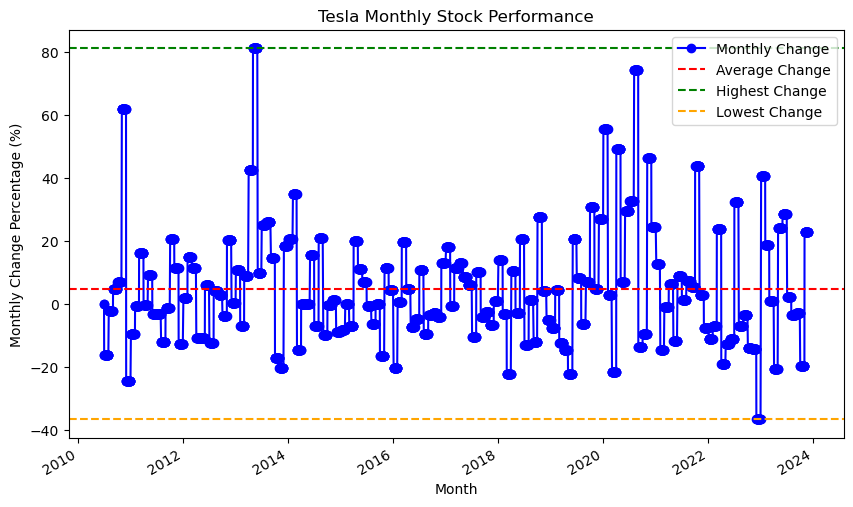

In [13]:
#This graph with help from matplot library . I learnt how to do a dot line graph but also apply the 
#average and highest and lowest change into the graph

# Plot the monthly change
plt.figure(figsize=(10, 6))
df_tesla['Month_Change'].plot(marker='o', linestyle='-', color='b', label='Monthly Change')

# Plot horizontal lines for average, highest, and lowest
average_change = df_tesla['Month_Change'].mean()
highest_change = df_tesla['Month_Change'].max()
lowest_change = df_tesla['Month_Change'].min()


#This graph with help from matplot library . I learnt how to do a dot line graph but also apply the 
plt.axhline(y=average_change, color='r', linestyle='--', label='Average Change')
plt.axhline(y=highest_change, color='g', linestyle='--', label='Highest Change')
plt.axhline(y=lowest_change, color='orange', linestyle='--', label='Lowest Change')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Monthly Change Percentage (%)')
plt.title('Tesla Monthly Stock Performance')
plt.legend()

# Show the plot
plt.show()



From the graph I can see the best month change are and worse change, The best monthly performance was 2013-May and it was about to reach over 80%, and the worse month was 2022-12 which down about 36%. The average month change overtime seems set around 5 percent. 

# Above and Beyond: Does Trading value related to the stock price? Do they have any relationship

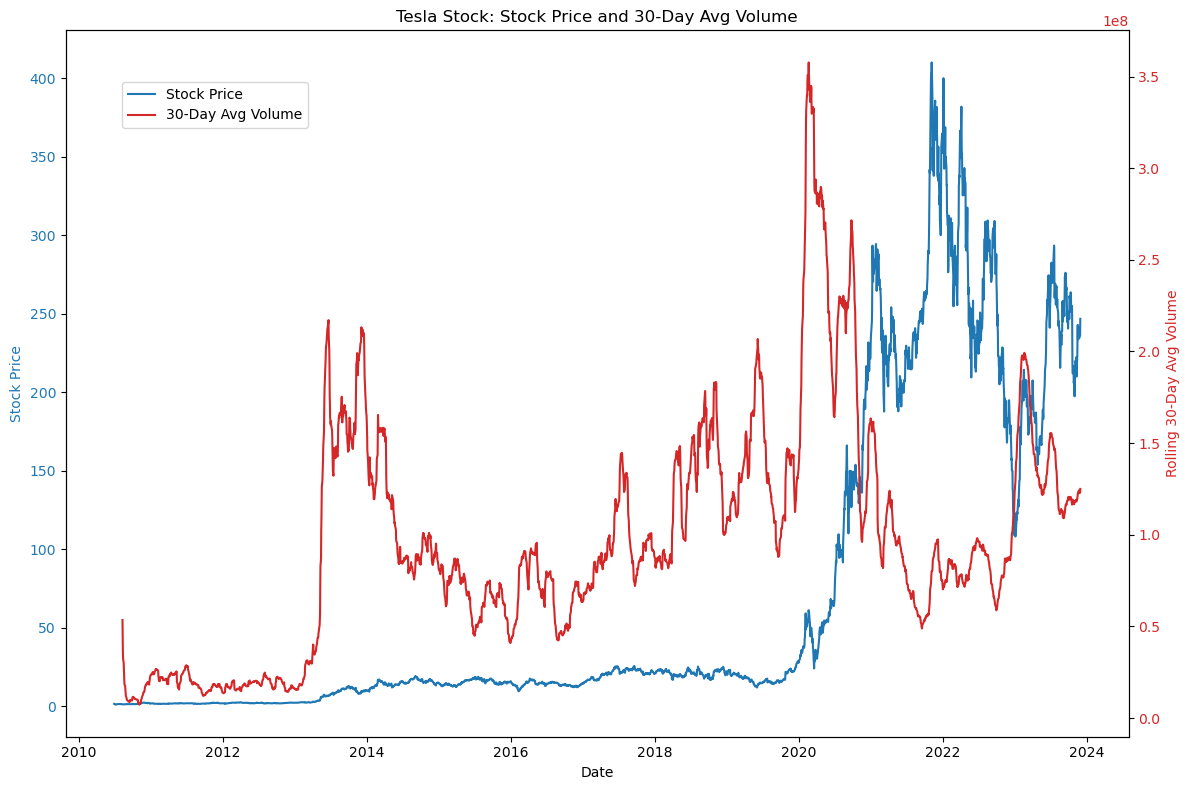

In [14]:

# Calculate the rolling 30-day average of trading volume and I called it Roll-volume with rolling function 
df_tesla['Rolling_Volume'] = df_tesla['Volume'].rolling(window=30).mean()

# Plot the lines
fig, ax1 = plt.subplots(figsize=(12, 8))

#Plot stock price on the left y-axis
#make this two line on the same graph 
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(df_tesla.index, df_tesla['Close'], color=color, label='Stock Price')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for trading volume one the right 
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Rolling 30-Day Avg Volume', color=color)
ax2.plot(df_tesla.index, df_tesla['Rolling_Volume'], color=color, label='30-Day Avg Volume')
ax2.tick_params(axis='y', labelcolor=color)

# Title and display the legend
plt.title('Tesla Stock: Stock Price and 30-Day Avg Volume')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

#show it 
plt.show()


From the Graph I can see the trend, but it is a bit hard to see the relationship directly from this graph. But usually a larger trading volume will have a larger in price change, in both ways.

In [15]:
#Use corrlation coefficient to find the relationship between Daily_change and Volumn

correlation_coefficient = df_tesla['Volume'].corr(df_tesla['Daily_Change'])
print("Correlation Coefficient:",correlation_coefficient)


Correlation Coefficient: 0.08162635774224387


0.0816 seems like a weak positive relationship between this two. But it might distract by the negative and positive change. So I decided to make an absoult value of daily change so I can see the relationship between trading value and stock price change more clearly and precise. 

In [16]:
# Create a absolute daily percentage change in stock price column in dataframe
df_tesla['Absolute_Day_Change'] = abs(df_tesla['Close'].pct_change() * 100)


In [17]:
#Use corrlation again to find the relationship with Abs daily change and volumn
correlation_coefficient_abs = df_tesla['Volume'].corr(df_tesla['Absolute_Day_Change'])
print(f"Correlation Coefficient:",correlation_coefficient_abs)

Correlation Coefficient: 0.4665806774463784


It shows a much stronger positive relationship between this two that suggest that larger trading volumn will result in larger price change. That matches the hypothesis. 

Plot a scatter plot with abs daily change value vs trading vale, to see if I can visulize the positive relationship

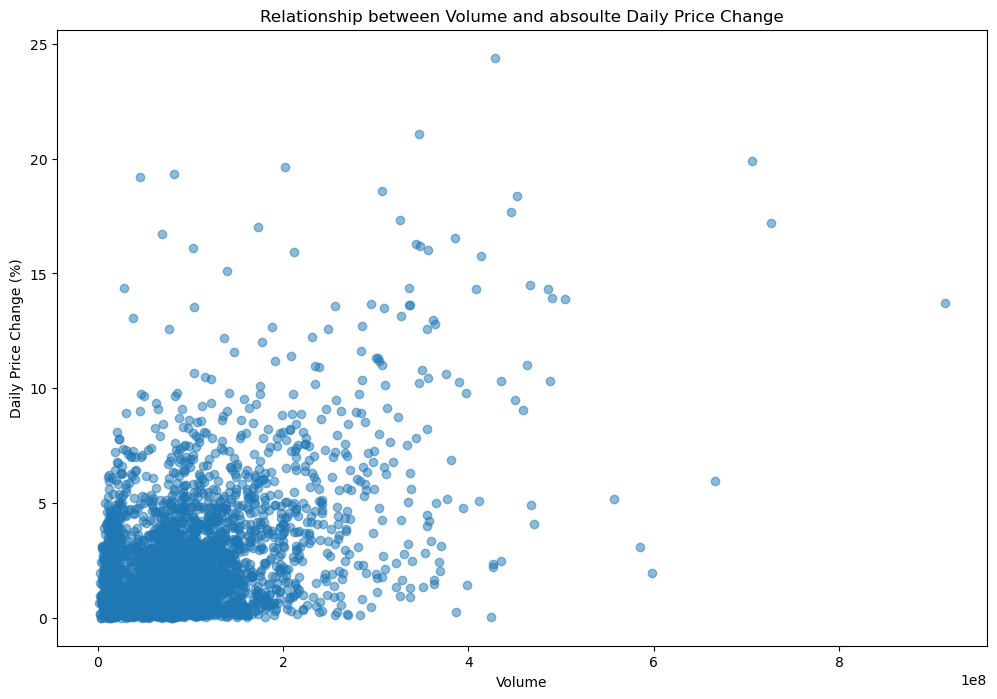

In [18]:
# plot  a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df_tesla['Volume'], df_tesla['Absolute_Day_Change'], alpha=0.5)
plt.title('Relationship between Volume and absoulte Daily Price Change')
plt.xlabel('Volume')
plt.ylabel('Daily Price Change (%)')
plt.show()


From the plot, I can see there is a trend, but it is not very clear. But it matches my coeffi test. 

In [19]:
#the final dataframe display
df_tesla

,Open,Close,Volume,Daily_Change,in_day_Percentage_Change,Month_Change,Rolling_Volume,Absolute_Day_Change
Date,,,,,,,,
2010-06-29,1.266667,1.592667,281494500,NaN,25.736835,-0.251151,NaN,NaN
2010-06-30,1.719333,1.588667,257806500,-0.251151,-7.599808,-0.251151,NaN,0.251151
2010-07-01,1.666667,1.464000,123282000,-7.847271,-12.160018,-16.324000,NaN,7.847271
2010-07-02,1.533333,1.280000,77097000,-12.568306,-16.521721,-16.324000,NaN,12.568306
2010-07-06,1.333333,1.074000,103003500,-16.093750,-19.449980,-16.324000,NaN,16.093750
...,...,...,...,...,...,...,...,...
2023-11-21,235.039993,241.199997,122288000,2.376906,2.620832,22.844058,1.237766e+08,2.376906
2023-11-22,242.039993,234.210007,117950600,-2.898006,-3.234997,22.844058,1.242514e+08,2.898006
2023-11-24,233.750000,235.449997,65125200,0.529435,0.727271,22.844058,1.227054e+08,0.529435
